# <h1><center>Patient's Sickness Prediction</center></h1>


## Table of Contents
1. Problem Statement
2. Dataset Description
3. Import Libraries
4. Import Dataset
5. Exploratory Data Analysis
6. Data Visualization
7. Declare Feature Vector and Target Variable
8. Split the Data into Training and Testing Sets
9. Fit the Decision Tree classifier to the Training Set
10. Text representation of the Tree
11. Visual Representaion of the Tree
12. Resolving Overfitting
13. Conclusion

## 1. Problem Statement
People today suffer from a wide range of illnesses as a result of their lifestyle choices
and the state of the environment. In order to stop such diseases from getting worse, it
is crucial to recognize and anticipate them early on. Most of the time, it is challenging
for physicians to precisely identify disorders by hand. Cardiovascular diseases (CVDs)
rank among the most serious illnesses. With an estimated 17.9 million deaths annually,
they are the world's largest cause of death.

## 2. Dataset Description
The cardio data set is data set consisting of 11 attributes and 70000 rows,  the attributes are :
1. Age, represented by the number of days as an integer value.
2. Gender, represented as a categorical code.
3. Height, represented as an integer value, in cm.
4. Weight, represented as a float value, in kg.
5. Systolic blood pressure denoted by ap_hi and represented as an integer value.
6. Diastolic blood pressure denoted by ap_lo and represented as an integer value.
7. Cholesterol denoted by cholesterol and represented as an integer value, where: 1: normal, 2: above normal, 3: well above normal.
8. Glucose denoted by gluc, and represented as an integer value, where: 1: normal, 2: above normal, 3: well above normal.
9. Smoking denoted by smoke and represented as a binary value.
10. Alcohol intake denoted by alco and represented as a binary value.
11. Physical activity denoted by active and represented as a binary value.

The target is either 'diseased' or 'not diseased' and it is represented in the dataset in the 'cardio' column

## 3. Import Libraries

In [1]:
#Import necessary libraries
#For data processing
import pandas as pd
import numpy as np
#Load and return the iris dataset
from sklearn.datasets import load_iris
#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# For splitting the dataset in training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score
#For checking the model accuracy
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import metrics
#For using decision tree models in scikit-learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 4. Import Dataset

In [2]:
df_cardio = pd.read_csv(r'C:\Users\User\Downloads\cardio.csv')

In [3]:
df_cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 5. Exploratory Data Analysis

### Drop Irrelevant Columns

In [4]:
df_cardio = df_cardio.drop(columns='id')

### View summary of dataset

In [98]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   weight       70000 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70000 non-null  float64
 4   cholesterol  70000 non-null  float64
 5   gluc         70000 non-null  float64
 6   smoke        70000 non-null  float64
 7   active       70000 non-null  float64
 8   cardio       70000 non-null  float64
dtypes: float64(9)
memory usage: 4.8 MB


### Frequency distribution of values in variables

In [5]:
df_cardio['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

### Explore missing values

In [5]:
df_cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 6. Data Visualization

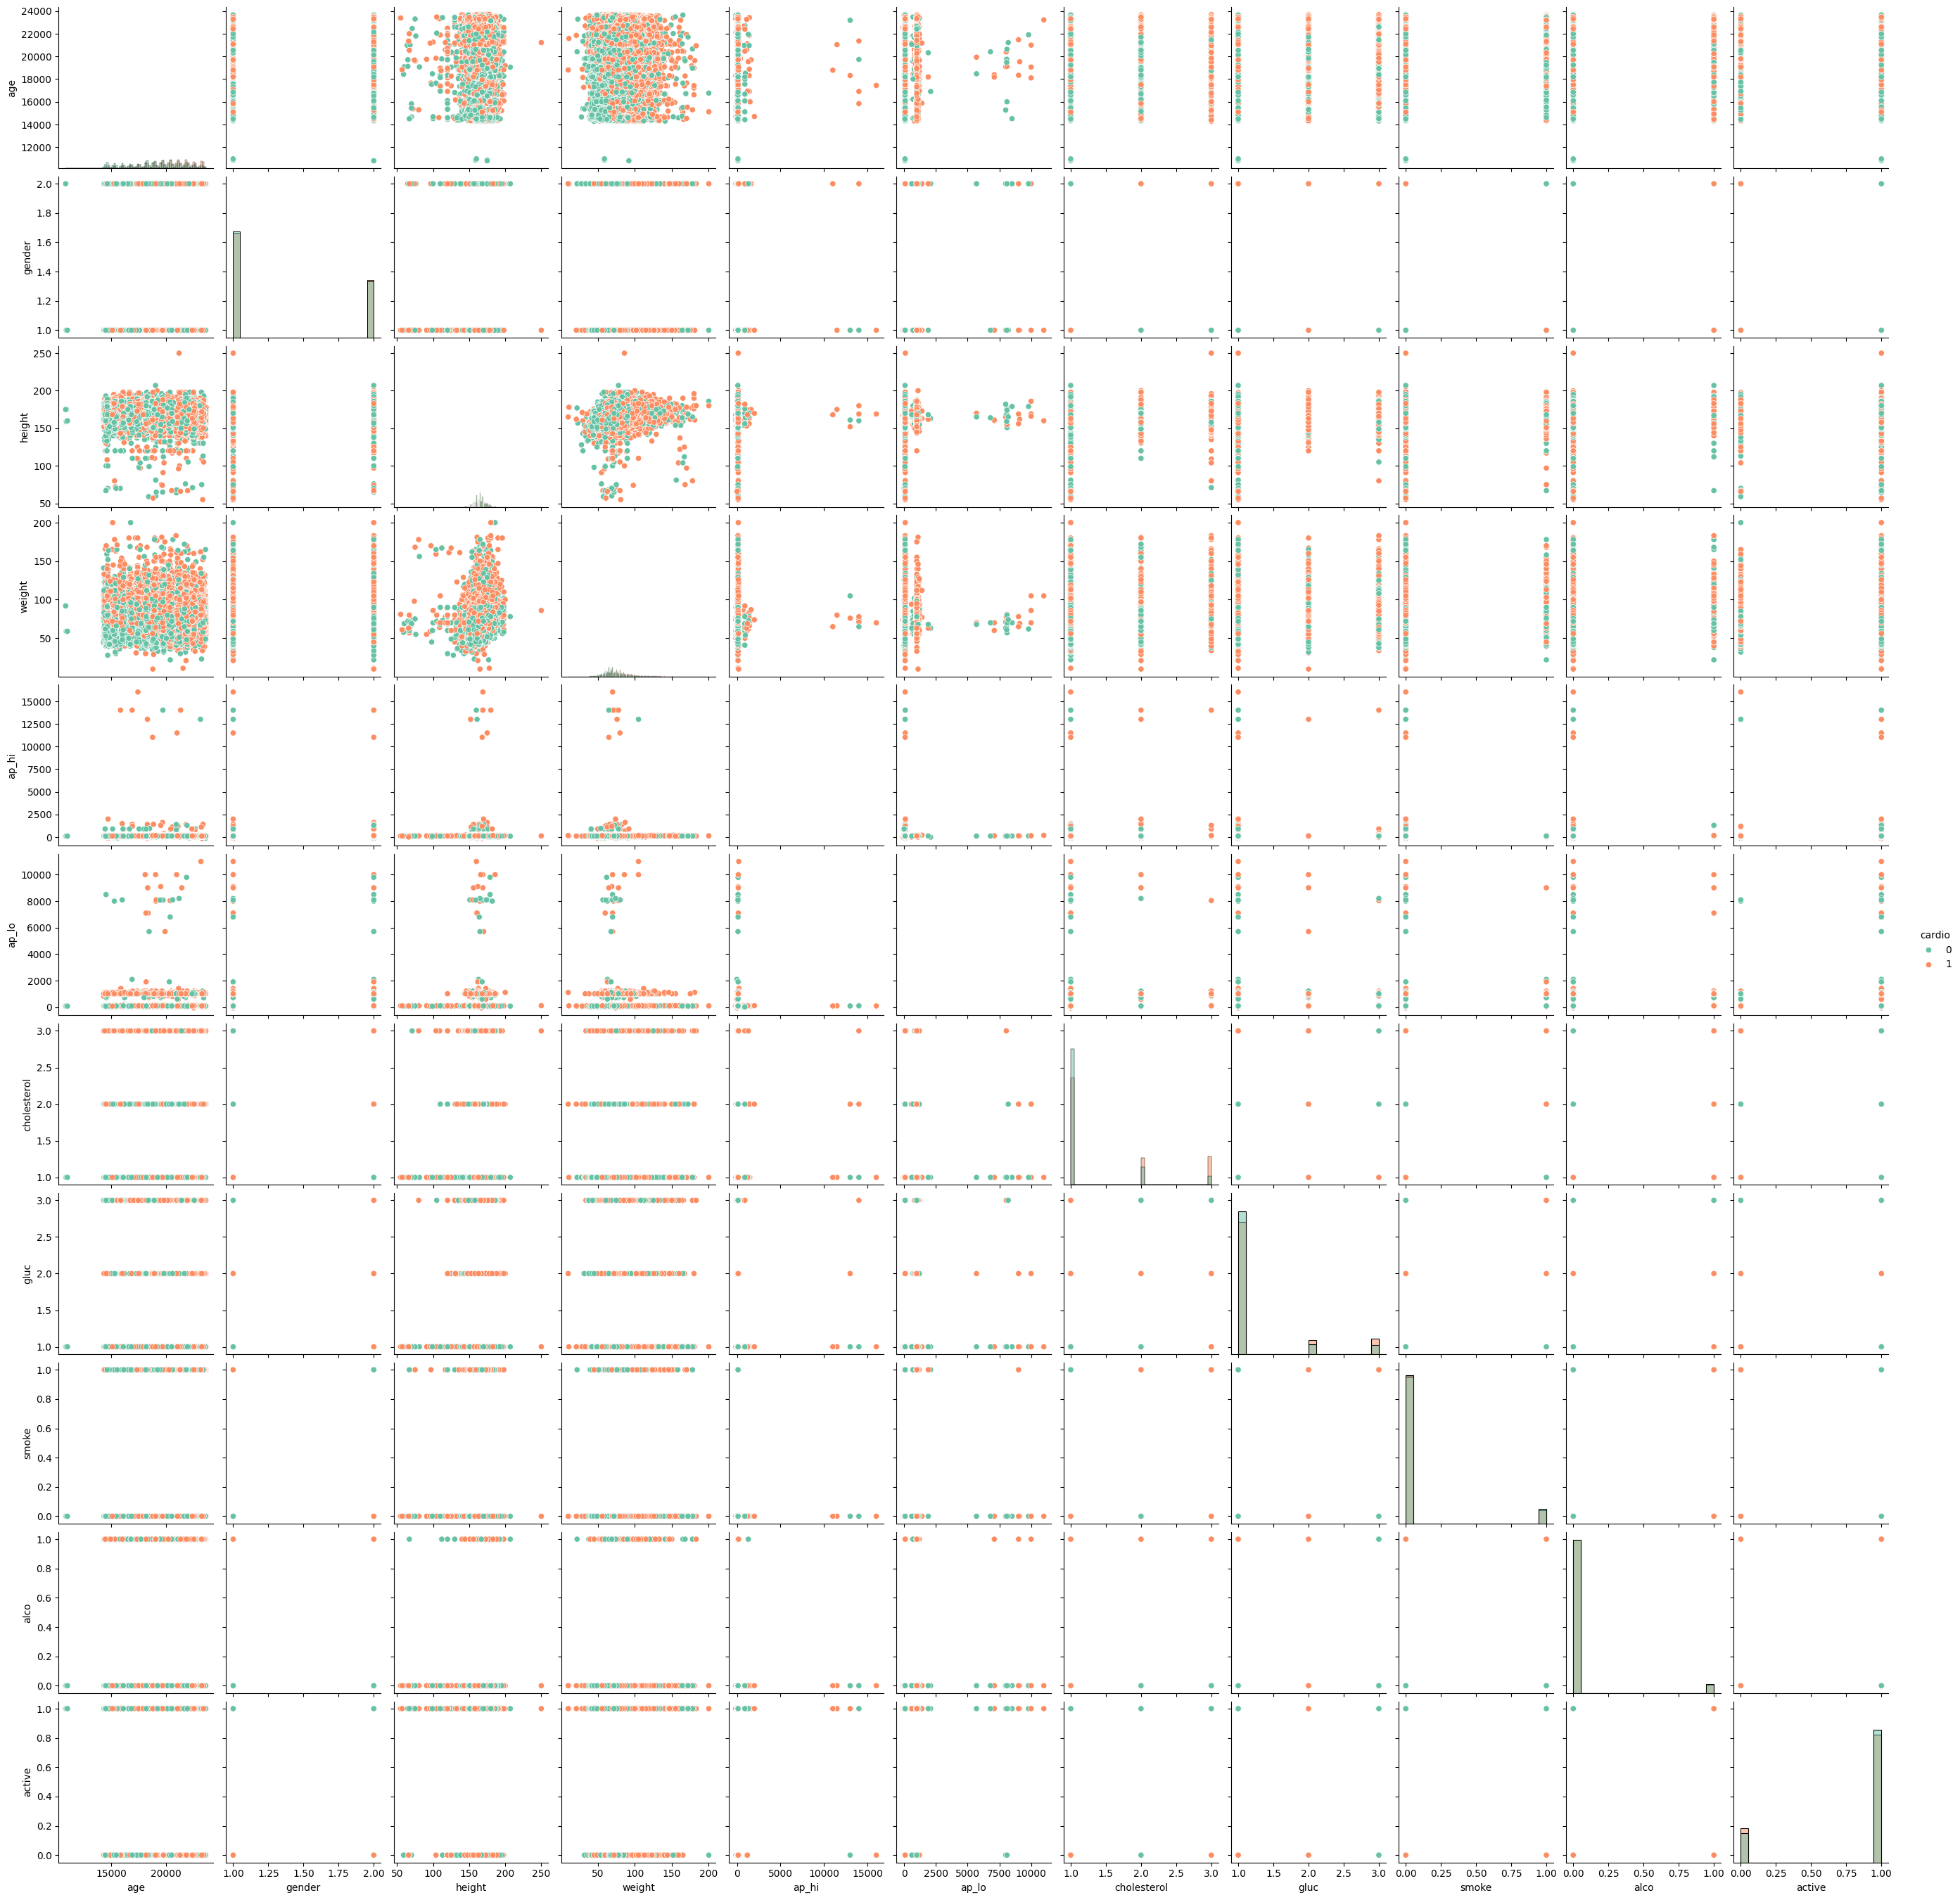

In [6]:
#Visualising bivaritate relationship between each pair of attributes
sns.set_palette('Set2')
b = sns.pairplot(data = df_cardio,hue="cardio", diag_kind='hist');
plt.show()

## 7. Declare Feature Vector and Target Variable

In [7]:
X = df_cardio.drop(columns=['cardio'])
y = df_cardio['cardio']

## 8. Split the Data into Training and Testing Sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [9]:
#Check the shape of x_train
x_train.shape

(49000, 11)

In [10]:
#Check the shape of x_test
x_test.shape

(21000, 11)

## 9. Fit the Decision Tree classifier to the Training Set

In [11]:
model = DecisionTreeClassifier(criterion="entropy")
model = model.fit(x_train, y_train)

In [12]:
print('Accuracy: {:0.4f}'. format(model.score(x_test, y_test)*100))

Accuracy: 63.6190


In [13]:
y_pred = model.predict(x_test)
print('Accuracy: {:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 63.6190


## 10. Text Representation of the Tree

In [14]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 129.50
|   |--- feature_0 <= 20150.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_0 <= 16091.50
|   |   |   |   |--- feature_4 <= 114.50
|   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |--- feature_3 <= 87.50
|   |   |   |   |   |   |   |--- feature_4 <= 109.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 51.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  51.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 74.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 59.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  59.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |--- feature_3 >  74.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 15145.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0

## 11. Visual Representaion of the Tree

[Text(0.5962343602170599, 0.9933333333333333, 'ap_hi <= 129.5\nentropy = 1.0\nsamples = 49000\nvalue = [24560, 24440]\nclass = 0'),
 Text(0.373043881980445, 0.98, 'age <= 20150.5\nentropy = 0.904\nsamples = 29027\nvalue = [19742, 9285]\nclass = 0'),
 Text(0.48463912109875246, 0.9866666666666666, 'True  '),
 Text(0.2060407652682555, 0.9666666666666667, 'cholesterol <= 1.5\nentropy = 0.796\nsamples = 18083\nvalue = [13736, 4347]\nclass = 0'),
 Text(0.09245217914510338, 0.9533333333333334, 'age <= 16091.5\nentropy = 0.743\nsamples = 15385\nvalue = [12139, 3246]\nclass = 0'),
 Text(0.025123715667339303, 0.94, 'ap_hi <= 114.5\nentropy = 0.539\nsamples = 4264\nvalue = [3738, 526]\nclass = 0'),
 Text(0.01437420067157106, 0.9266666666666666, 'gluc <= 1.5\nentropy = 0.421\nsamples = 1790\nvalue = [1637, 153]\nclass = 0'),
 Text(0.010427864560065855, 0.9133333333333333, 'weight <= 87.5\nentropy = 0.393\nsamples = 1692\nvalue = [1561, 131]\nclass = 0'),
 Text(0.006391280133088585, 0.9, 'ap_hi <= 

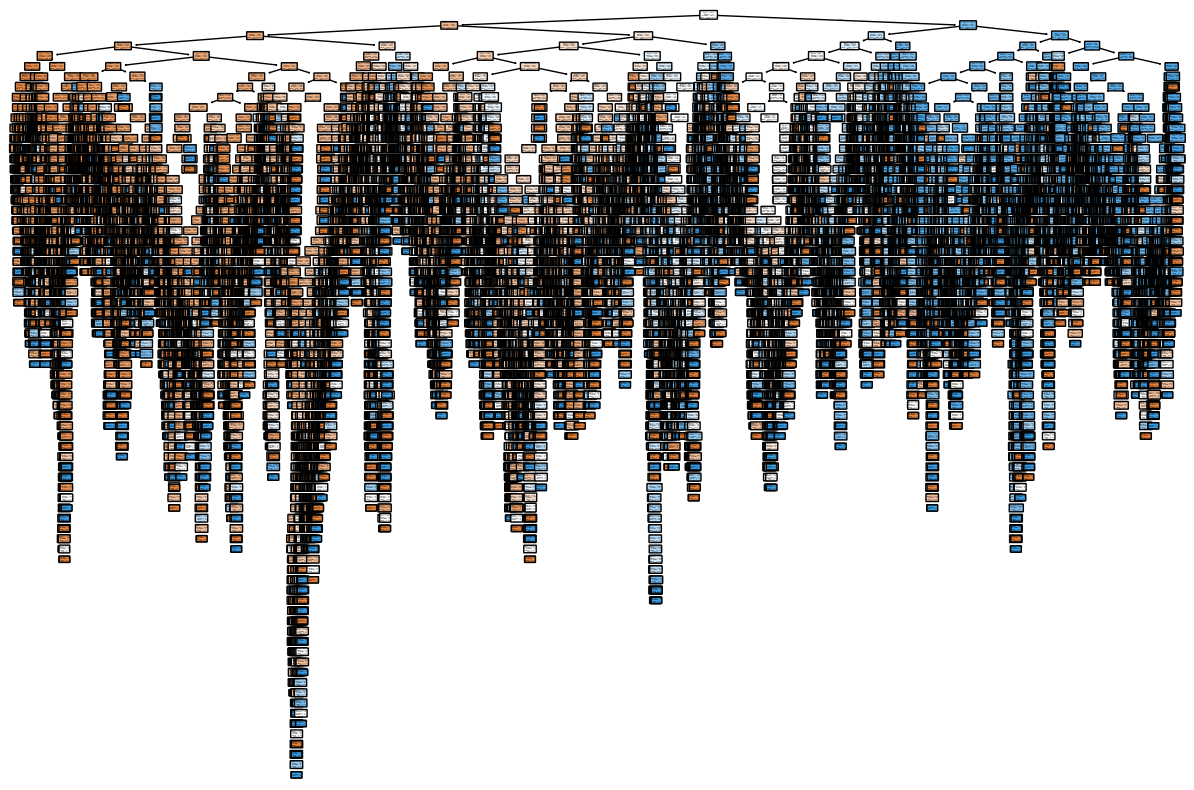

In [15]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(model,feature_names = X.columns,
class_names = ['0','1'],
filled = True,
rounded = True)

This figure shows clearly that there is an overfitting problem in this model and the tree is unreadable when visualized, also the accuracy is 63.61 which we should work on to increase.

## 12. Resolving Overfitting

### Observing correlation

In [16]:
correlation_matrix = df_cardio.corr()
print(correlation_matrix['cardio'].sort_values(ascending=False))

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


### Drop columns with least correlation

In [17]:
df_cardio = df_cardio.drop(columns=['height','alco','gender','smoke','active'])
df_cardio.head()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,62.0,110,80,1,1,0
1,20228,85.0,140,90,3,1,1
2,18857,64.0,130,70,3,1,1
3,17623,82.0,150,100,1,1,1
4,17474,56.0,100,60,1,1,0


### Reassigning train and test sets

In [18]:
X = df_cardio.drop(columns=['cardio'])
y = df_cardio['cardio']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Fitting the new model
After removing the columns with less correlation, we reset the model with the new train and test sets.

And to increase accuracy more we assign the variables (*max_depth*, *min_samples_split*, *min_leaf_split* ) to control the size of the tree and limit its complexity.

In [42]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=7, min_samples_split=24, min_samples_leaf=17)
model = model.fit(x_train, y_train)
cv_scores = cross_val_score(model, x_train, y_train, cv=5)
print(f" Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 100:.2f}%)")
print('Accuracy: {:0.4f}'. format(model.score(x_test, y_test)*100))
y_pred = model.predict(x_test)
print('Accuracy: {:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)*100))

 Cross-Validation Accuracy: 73.00% (+/- 0.31%)
Accuracy: 73.5952
Accuracy: 73.5952


Accuracy increased into 73.59 which is a critical increase. We calculated the accuracy also over a cross-validation set for more precised result. Inaddition, the low standard deviation assures the consistency and reliability of the model.

### Revisualizing the tree

In [35]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 129.50
|   |--- feature_0 <= 20150.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- feature_0 <= 16091.50
|   |   |   |   |--- feature_2 <= 114.50
|   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 87.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  87.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |   |--- feature_0 <= 15295.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  15295.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  114.50
|   |   |   |   |   |--- feature_1 <= 59.50
|   |   |   |   |   |   |--- feature_0 <= 15502.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  15502.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  59.50
|   |   |   |   |   |   |--- feature_0 <= 15049.50
|   |   |   |  

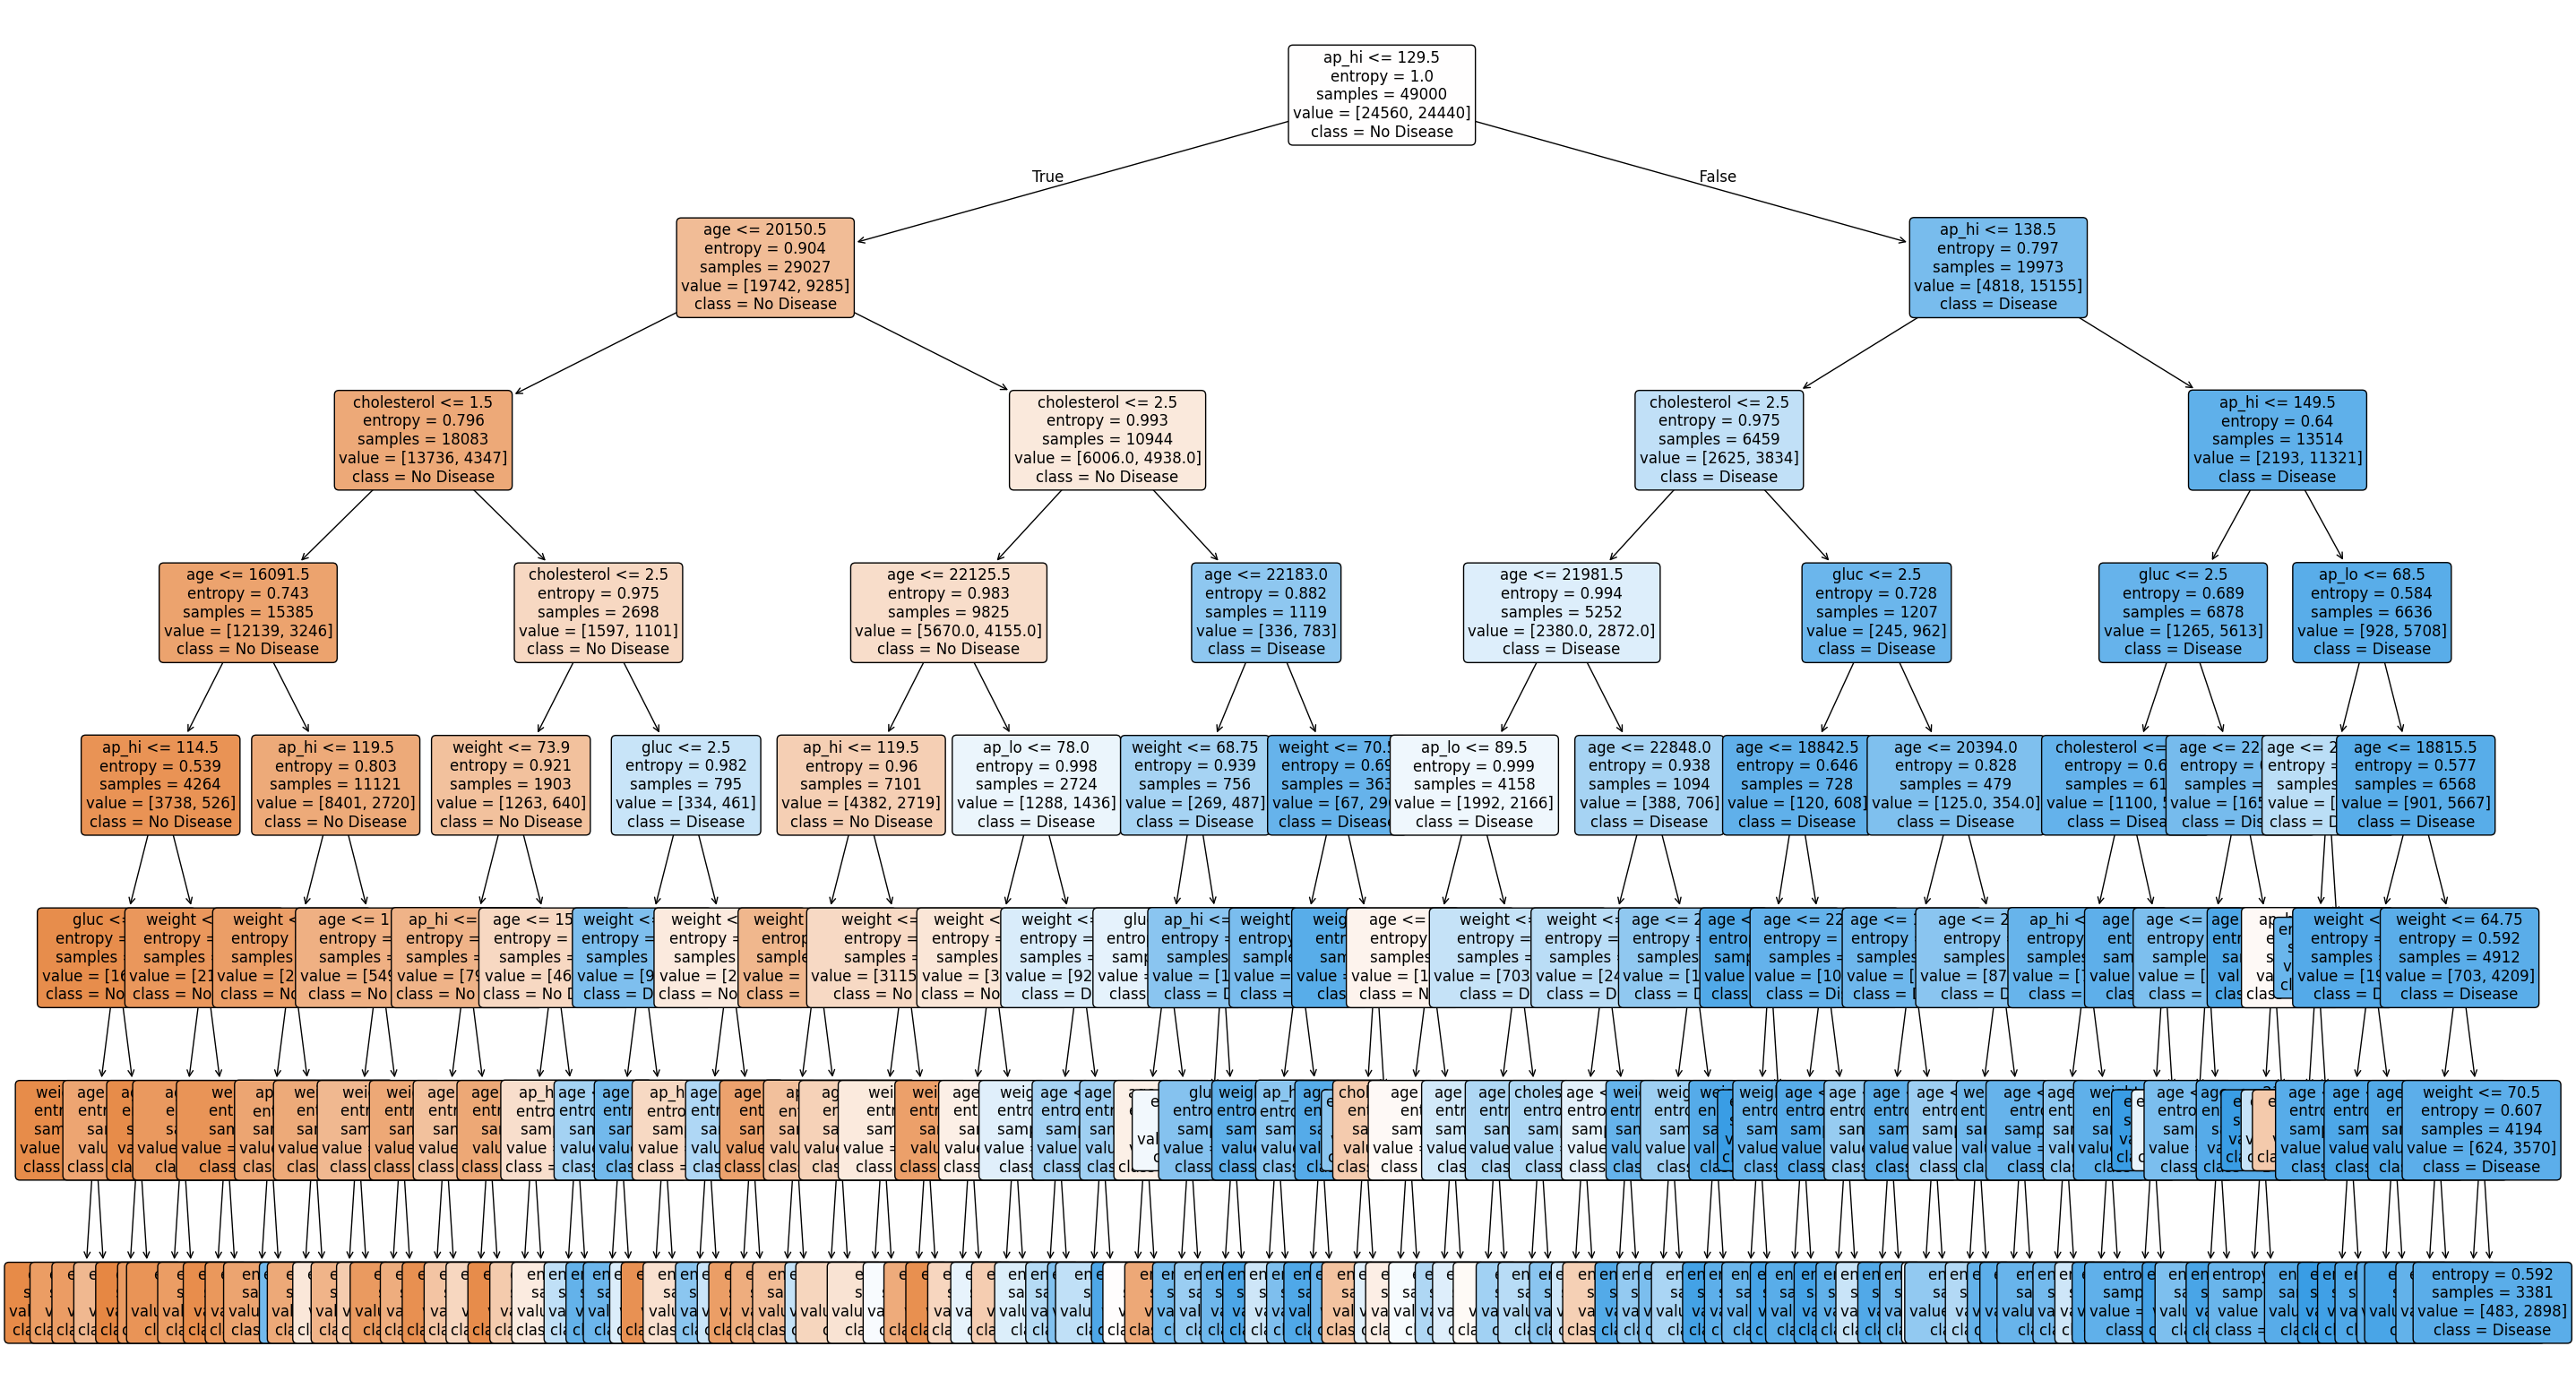

In [36]:
plt.figure(figsize=(35, 20))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, fontsize=12) 
plt.show()

## 13. Conclusion
We got finally a cosistent model with accuracy 73.59 which is good for such application. We learnt that optimizing the paramaters of a decision tree can make a big difference in the model's accuracy. 

For further enhancements it is required to explore more advanced variants of decision tree such as bagging and random forests that can use multiple decision trees, also feature engineering can help by creating new features out of existing features which can help in reading more patterns in data.